<a href="https://colab.research.google.com/github/Nurfaidah636/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Mengubah tingkat kecerahan citra dengan transformasi log 
 --------------------------------
Masukkan nilai kecerahan: 70


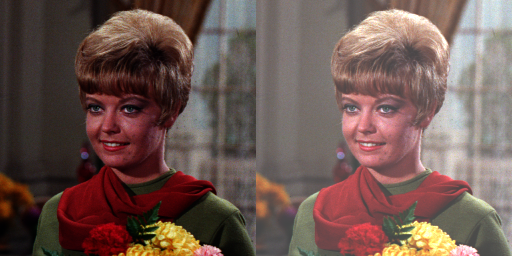

In [41]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from tkinter import Frame

print(' Mengubah tingkat kecerahan citra dengan transformasi log ')
print(' --------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


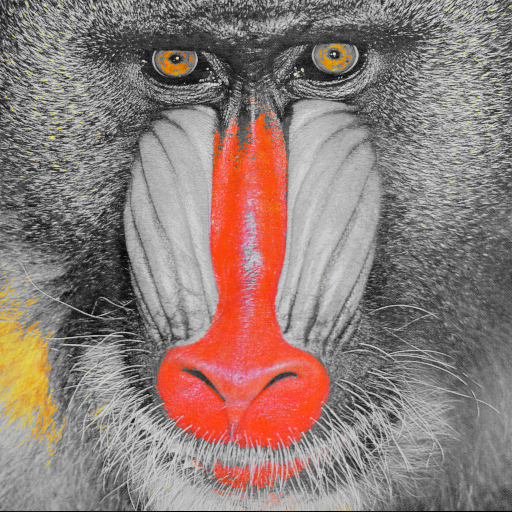

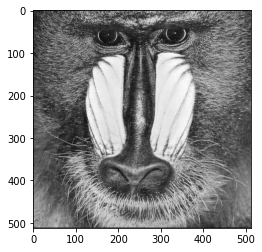

In [39]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv.imread('/content/drive/MyDrive/image/mandrill.tiff')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_color)

imgavg = cv.imread('/content/drive/MyDrive/image/mandrill.tiff')
imgavg[:] = imgavg.mean(axis=-1, keepdims=1)
plt.imshow(imgavg)

imglight = cv.imread('/content/drive/MyDrive/image/mandrill.tiff')
imglight[:] = np.max(imglight,axis=-1, keepdims=1)/2+np.min(imglight,axis=-1,keepdims=1)/2
plt.imshow(imglight)

imglumin = cv.imread('/content/drive/MyDrive/image/mandrill.tiff')
R, G, B = imglumin[:,:,0], imglumin[:,:,0], imglumin[:,:,2]

gray_imglumin = (0.21 * R ) + (0.72 * G) + (0.07 * B)

plt.imshow(gray_imglumin, cmap='gray')

r = cv.imread('/content/drive/MyDrive/image/mandrill.tiff')
ret, mask = cv.threshold(r[:,:,2], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(r)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(r, mask3)
gray = cv.cvtColor(r, cv.COLOR_BGR2GRAY)
r = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(r, 255 - mask3)

out = gray + red
cv2_imshow(out)
